# Numpy

[NumPy](https://www.dataquest.io/blog/numpy-tutorial-python/) is a commonly used Python data analysis package. By using NumPy, you can speed up your workflow, and interface with other packages in the Python ecosystem, like scikit-learn, that use NumPy under the hood. NumPy was originally developed in the mid 2000s, and arose from an even older package called Numeric. This longevity means that almost every data analysis or machine learning package for Python leverages NumPy in some way.

## Download Wine Quality Data Set

In [1]:
import requests

# download Wine Quality Data Set.
r = requests.get("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", stream=True)
if r.status_code == 200:
    with open("winequality-red.csv", 'wb') as f:
        for chunk in r.iter_content(1024):
            f.write(chunk)

## Read dataset

In [27]:
import pandas as pd

wines = pd.read_csv("winequality-red.csv", ';')
print wines.shape
wines.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
import csv
with open("winequality-red.csv", 'r') as f:
    wines = list(csv.reader(f, delimiter=";"))

# skip header
wines = np.array(wines[1:], dtype=np.float)
wines.shape

(1599, 12)

In [29]:
import numpy as np
wines = np.genfromtxt("winequality-red.csv", delimiter=";", skip_header=1)
wines.shape

(1599, 12)

## Creating A NumPy Array

In [35]:
a = np.zeros((3,4))
print a

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [36]:
a.reshape(2,6)

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [37]:
a.dtype

dtype('float64')

In [38]:
# create a array of random numbers
b = np.random.rand(3,4)
print b.dtype
print b

float64
[[ 0.47340722  0.26032462  0.93331738  0.34234496]
 [ 0.54765394  0.165398    0.51294266  0.4961539 ]
 [ 0.06106089  0.34025539  0.31058294  0.21797288]]


In [44]:
c = np.linspace(0, 50, 10)
print c

[  0.           5.55555556  11.11111111  16.66666667  22.22222222
  27.77777778  33.33333333  38.88888889  44.44444444  50.        ]


In [45]:
# convert data type
c.astype(int)

array([ 0,  5, 11, 16, 22, 27, 33, 38, 44, 50])

## Array operations

In [46]:
wines[:, 11] + 10

array([ 15.,  15.,  15., ...,  16.,  15.,  16.])

In [47]:
wines[:, 11] += 10

In [48]:
wines[:,11] + wines[:,11]

array([ 30.,  30.,  30., ...,  32.,  30.,  32.])

In [49]:
# Let’s say we want to pick a wine that maximizes alcohol 
# content and quality (we want to get drunk, but we’re classy). 
# We’d multiply alcohol by quality, and select the wine with the highest score:
# Note: /, *, -, +, ^ performs element math for same size vectors.
wines[:,10] * wines[:,11]

array([ 141.,  147.,  147., ...,  176.,  153.,  176.])

In [51]:
# Broadcasting

array_one = np.array(
    [
        [1,2],
        [3,4]
    ]
)
array_two = np.array([4,5])

array_one + array_two

array([[5, 7],
       [7, 9]])

In [52]:
# Array methods

wines.sum()

168074.78193999999

In [53]:
# sums over the first axis of the array. 
# This will give us the sum of all the values in every column. 
wines.sum(axis=0)

array([ 13303.1    ,    843.985  ,    433.29   ,   4059.55   ,
          139.859  ,  25384.     ,  74302.     ,   1593.79794,
         5294.47   ,   1052.38   ,  16666.35   ,  25002.     ])

In [54]:
# If we pass in axis=1, we’ll find the sums over 
# the second axis of the array. This will give us the sum of each row:
wines.sum(axis=1)

array([  84.5438 ,  133.0548 ,  109.699  , ...,  110.48174,  115.21547,
        102.49249])

## Matrix 

In [60]:
A = np.matrix('1.0 2.0; 3.0 4.0')
print A

[[ 1.  2.]
 [ 3.  4.]]


In [61]:
# transpose
A.T

matrix([[ 1.,  3.],
        [ 2.,  4.]])

In [62]:
# matrix multiplication
X = np.matrix('5.0 7.0')
A*X.T

matrix([[ 19.],
        [ 43.]])

In [64]:
# matrix inverse
A.I

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

## Vector Stacking

In [56]:
x = np.arange(0,10,2)                     # x=([0,2,4,6,8])
y = np.arange(5)                          # y=([0,1,2,3,4])
m = np.vstack([x,y])                      # m=([[0,2,4,6,8],
                                          #     [0,1,2,3,4]])
xy = np.hstack([x,y])                     # xy =([0,2,4,6,8,0,1,2,3,4])

## Histograms

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


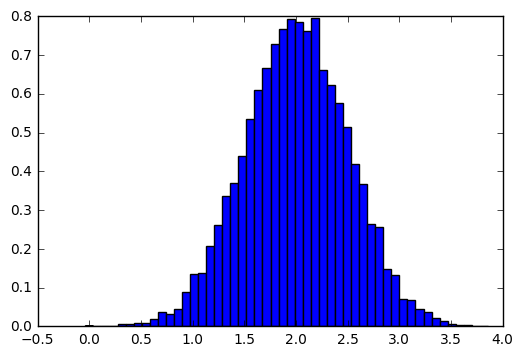

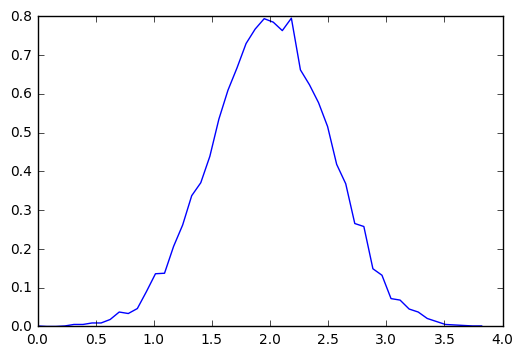

In [57]:
import numpy
import pylab
# Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu, sigma = 2, 0.5
v = numpy.random.normal(mu,sigma,10000)
# Plot a normalized histogram with 50 bins
pylab.hist(v, bins=50, normed=1)       # matplotlib version (plot)
pylab.show()
# Compute the histogram with numpy and then plot it
(n, bins) = numpy.histogram(v, bins=50, normed=True)  # NumPy version (no plot)
pylab.plot(.5*(bins[1:]+bins[:-1]), n)
pylab.show()